In [50]:
# Start loading libraries

#! pip install yfinance
#! pip install matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

#! pip install pmdarima
import pmdarima as pm
from pmdarima import model_selection

import scipy
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from arch.unitroot import PhillipsPerron
from arch.unitroot import KPSS

from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
#from statsmodels.graphics.tsaplots import plot_acf

#from matplotlib.ticker import NullFormatter
#import yfinance as yf
#import warnings; warnings.simplefilter('ignore')
#%matplotlib inline

In [51]:
xls_file = pd.ExcelFile("Data_daily_final.xlsx") # Read Excel
df1=xls_file.parse("Brent").set_index(['Timestamp']) # Read the Brent sheet, use first column as index

#df1["Timestamp"] = df1["Date"].astype('datetime64[ns]') # Convert column to date format
#df1.to_excel("values.xlsx")  #print to excel


In [52]:
df2=xls_file.parse("WTI").set_index(['Timestamp'])
df1 = pd.merge(df1, df2, how='left', on='Timestamp')

df2=xls_file.parse("Gasoil").set_index(['Timestamp'])
df1 = pd.merge(df1, df2, how='left', on='Timestamp')

df2=xls_file.parse("NatGas").set_index(['Timestamp'])
df1 = pd.merge(df1, df2, how='left', on='Timestamp')

df2=xls_file.parse("FCPO").set_index(['Timestamp'])
df1 = pd.merge(df1, df2, how='left', on='Timestamp')

#df2=xls_file.parse("SBO").set_index(['Timestamp'])
#df1 = pd.merge(df1, df2, how='left', on='Timestamp')


df1.describe()

,LCOc1,LCOc3,LCOc6,LCOc9,LCOc12,CLc1,CLc3,CLc6,CLc9,CLc12,...,MYR3MV=,MYR6MV=,MYR9MV=,MYR1YV=,MYR1YNDFOR= (tää on ndf?),FCPOc1 USD,FCPOc3 USD,FCPOc6 USD,FCPOc9 USD,FCPOc12 USD
count,8812.000000,8688.000000,8504.000000,7971.000000,7342.000000,8593.000000,8593.000000,8591.000000,8591.000000,8514.000000,...,8328.000000,8257.000000,6977.000000,7705.000000,4710.000000,8785.000000,8328.000000,8257.000000,6977.000000,7705.000000
mean,50.153182,50.535009,51.075969,52.934431,55.648491,48.415942,48.533457,48.374616,48.108839,48.139906,...,3.489611,3.523530,3.234374,3.530172,3.729521,543.899515,548.581784,539.914157,641.249767,374.011655
std,33.036810,32.809948,32.599450,32.417927,31.887650,29.569193,29.604570,29.555353,29.445368,29.265569,...,0.592629,0.551673,0.639394,0.597586,0.462350,287.515040,276.851913,267.618583,279.810192,395.918932
min,9.640000,10.160000,10.920000,11.360000,11.700000,-37.630000,11.330000,12.060000,12.450000,12.700000,...,2.433600,2.485000,2.661500,2.434000,2.975000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.487500,19.500000,19.590000,19.870000,23.500000,20.950000,20.680000,20.500000,20.295000,20.180000,...,3.061500,3.076600,2.779500,3.144000,3.297700,354.722997,360.515882,350.645927,494.723199,0.000000
50%,43.400000,45.470000,48.200000,52.600000,56.500000,42.150000,43.600000,44.340000,44.560000,45.300000,...,3.656000,3.641200,2.820500,3.651400,3.690000,506.767516,522.818447,504.716981,602.899963,434.600335
75%,72.242500,72.982500,73.910000,75.800000,78.025000,69.870000,70.340000,70.050000,70.205000,70.550000,...,3.815125,3.854200,4.041500,3.994000,4.177800,695.737192,695.861079,682.916885,806.998750,698.940998
max,146.080000,147.050000,148.130000,148.540000,148.210000,145.290000,146.130000,146.850000,146.860000,146.320000,...,4.725500,4.820500,4.657000,4.970000,4.715000,1947.745168,1686.092242,1469.533226,1504.937742,1426.958525


<AxesSubplot:xlabel='Timestamp'>

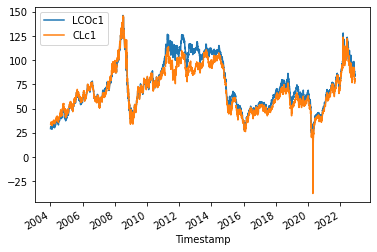

In [54]:
spot = df1[["LCOc1","CLc1", "LGOc1", "TRNLTTFD1 USD", "FCPOc1 USD"]]

spot = spot.loc['2004-01-01':'2022-11-30']
#spot = np.log(spot).diff()
spot[["LCOc1","CLc1"]].plot()

<AxesSubplot:xlabel='Timestamp'>

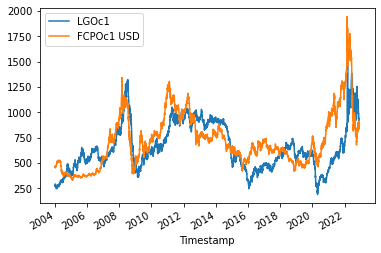

In [55]:
df3 = spot[spot["FCPOc1 USD"] != 0]
df3[["LGOc1","FCPOc1 USD"]].plot()

<AxesSubplot:xlabel='Timestamp'>

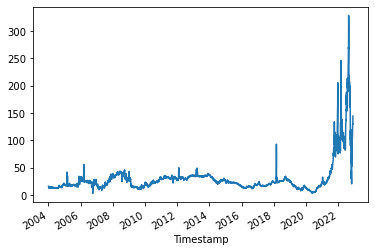

In [56]:
df4 = spot[spot["TRNLTTFD1 USD"] != 0]
df4["TRNLTTFD1 USD"].plot()

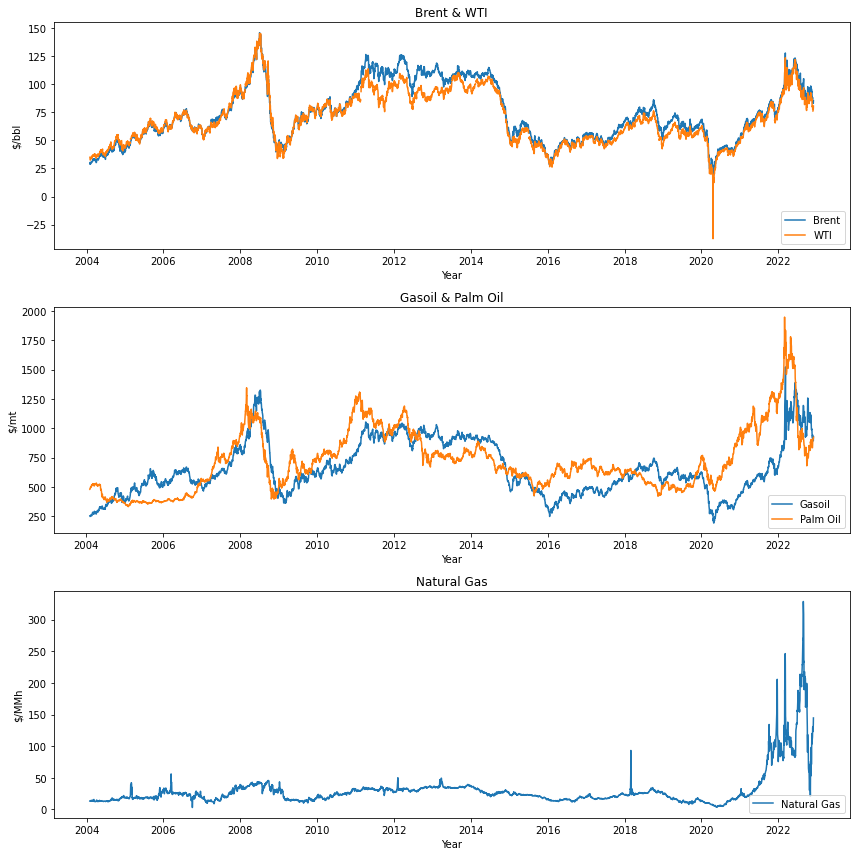

In [49]:
figure, axis = plt.subplots(3, 1, figsize=(12, 12))

axis[0].plot(spot[["LCOc1","CLc1"]], label=["Brent","WTI"])
axis[0].set_title("Brent & WTI")
axis[0].legend(loc="lower right")
axis[0].set_xlabel("Year")
axis[0].set_ylabel("$/bbl")

axis[1].plot(df3[["LGOc1","FCPOc1 USD"]], label=['Gasoil', 'Palm Oil'])
axis[1].set_title("Gasoil & Palm Oil")
axis[1].legend(loc="lower right")
axis[1].set_xlabel("Year")
axis[1].set_ylabel("$/mt")

axis[2].plot(df4[["TRNLTTFD1 USD"]], label='Natural Gas')
axis[2].set_title("Natural Gas")
axis[2].legend(loc="lower right")
axis[2].set_xlabel("Year")
axis[2].set_ylabel("$/MMh")

figure.tight_layout()
plt.show()

